<a href="https://colab.research.google.com/github/bongduk/LSTM_EyeTracking/blob/main/please_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from torch.utils.data import Dataset, DataLoader
import torch
from torch import nn, optim
import torch.nn.functional as F
from asyncio.log import logger
from pickle import FALSE
from tkinter import Label
import pandas as pd
import numpy as np
import tensorboard
from tqdm.auto import tqdm
import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import seaborn as sns
#from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.ticker import MaxNLocator

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from multiprocessing import cpu_count
from sklearn.metrics import classification_report, confusion_matrix

sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#ADFF02", '#8F00FF']
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
#rcParams['figure.figsize'] = 16,10


import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler

all_data = []
for filename in glob.glob("/content/drive/MyDrive/LSTM데이터/Output_Exclude_Outside_IA_405/*.xls"):
  temp_df = pd.read_csv(filename, delimiter='\t') #xls라고는 되어있는데 xlrd로도 안열리고 csv로 겨우 열리는데 칼럼 separated 안되서 delimiter 는 스페이스라는거 꼭 넣어줘야됨 하 이거 알아낸다고 한참 걸렸네 정말말
  temp_df = temp_df.truncate(before=10) #, after=180009)
  temp_df = temp_df[temp_df['AVERAGE_INTEREST_AREA_LABEL'].str.contains('IA_SlightlyBigger_220530')]
  temp_df.reset_index(drop=True, inplace=True)   
  temp_df['TIME']=temp_df.index #t시간 0부터 시작으로 통일 
  temp_df=temp_df.drop(["TIMESTAMP"], axis=1)
  temp_df['AVERAGE_GAZE_X'] = pd.to_numeric(temp_df['AVERAGE_GAZE_X'], errors='coerce') #다 float을 바꾸기
  temp_df['AVERAGE_GAZE_Y'] = pd.to_numeric(temp_df['AVERAGE_GAZE_Y'], errors='coerce')
  temp_df['AVERAGE_ACCELERATION_X'] = pd.to_numeric(temp_df['AVERAGE_ACCELERATION_X'], errors='coerce')
  temp_df['AVERAGE_ACCELERATION_Y'] = pd.to_numeric(temp_df['AVERAGE_ACCELERATION_Y'], errors='coerce')
  temp_df['AVERAGE_VELOCITY_X'] = pd.to_numeric(temp_df['AVERAGE_VELOCITY_X'], errors='coerce')
  temp_df['AVERAGE_VELOCITY_Y'] = pd.to_numeric(temp_df['AVERAGE_VELOCITY_Y'], errors='coerce')
  temp_df=temp_df.fillna(method='ffill') #결측치 이전값으로 채우기
  temp_df=temp_df.drop(["RECORDING_SESSION_LABEL"], axis=1) #스케일 위해 빼놓기
  temp_df=temp_df.drop(["AVERAGE_INTEREST_AREA_LABEL"], axis=1) #스케일 위해 빼놓기
  temp_df=temp_df.drop(['AVERAGE_ACCELERATION_X'], axis=1) #스케일 위해 빼놓기
  temp_df=temp_df.drop(['AVERAGE_ACCELERATION_Y'], axis=1) #스케일 위해 빼놓기
  temp_df=temp_df.drop(['AVERAGE_VELOCITY_X'], axis=1) #스케일 위해 빼놓기
  temp_df=temp_df.drop(['AVERAGE_VELOCITY_Y'], axis=1) #스케일 위해 빼놓기
  df = pd.read_csv(filename, delimiter='\t') 
  temp_df['RECORDING_SESSION_LABEL']= df['RECORDING_SESSION_LABEL']  
  print(filename)
  all_data.append(temp_df)
  dataset_cleaned = pd.concat(all_data)

#dataset_cleaned=dataset_cleaned[['RECORDING_SESSION_LABEL','TIME','AVERAGE_GAZE_X', 'AVERAGE_GAZE_Y', 'AVERAGE_IN_BLINK',
#       'AVERAGE_IN_SACCADE', 'AVERAGE_VELOCITY_X', 'AVERAGE_VELOCITY_Y',
#       'AVERAGE_ACCELERATION_Y', 'AVERAGE_ACCELERATION_X']]
#dataset_cleaned.to_csv('Final_X_TRAIN_407.csv')
#x_train=dataset_cleaned

#x_train = pd.read_csv("Final_X_TRAIN_407.csv")
#y_train = pd.read_excel("D:/D드라이브_Eye-Tracking 관련/2022 분석/FINAL_Y_TRAIN - Copy")

###############################################################################






/content/drive/MyDrive/LSTM데이터/Output_Exclude_Outside_IA_405/IAEXCLUDED_etrchr003.xls
/content/drive/MyDrive/LSTM데이터/Output_Exclude_Outside_IA_405/IAEXCLUDED_etrchr004.xls
/content/drive/MyDrive/LSTM데이터/Output_Exclude_Outside_IA_405/IAEXCLUDED_etrchr005.xls


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/content/drive/MyDrive/LSTM데이터/Output_Exclude_Outside_IA_405/IAEXCLUDED_etrchr006.xls
/content/drive/MyDrive/LSTM데이터/Output_Exclude_Outside_IA_405/IAEXCLUDED_etrchr007.xls
/content/drive/MyDrive/LSTM데이터/Output_Exclude_Outside_IA_405/IAEXCLUDED_etrchr008.xls
/content/drive/MyDrive/LSTM데이터/Output_Exclude_Outside_IA_405/IAEXCLUDED_etrchr009.xls
/content/drive/MyDrive/LSTM데이터/Output_Exclude_Outside_IA_405/IAEXCLUDED_etrchr010.xls
/content/drive/MyDrive/LSTM데이터/Output_Exclude_Outside_IA_405/IAEXCLUDED_etrchr011.xls
/content/drive/MyDrive/LSTM데이터/Output_Exclude_Outside_IA_405/IAEXCLUDED_etrchr012.xls
/content/drive/MyDrive/LSTM데이터/Output_Exclude_Outside_IA_405/IAEXCLUDED_etrchr013.xls
/content/drive/MyDrive/LSTM데이터/Output_Exclude_Outside_IA_405/IAEXCLUDED_etrchr014.xls
/content/drive/MyDrive/LSTM데이터/Output_Exclude_Outside_IA_405/IAEXCLUDED_etrchr015.xls
/content/drive/MyDrive/LSTM데이터/Output_Exclude_Outside_IA_405/IAEXCLUDED_etrchr020.xls
/content/drive/MyDriv

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3,4,5,6,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


/content/drive/MyDrive/LSTM데이터/Output_Exclude_Outside_IA_405/IAEXCLUDED_etrfep004.xls
/content/drive/MyDrive/LSTM데이터/Output_Exclude_Outside_IA_405/IAEXCLUDED_etrfep006.xls
/content/drive/MyDrive/LSTM데이터/Output_Exclude_Outside_IA_405/IAEXCLUDED_etrfep007.xls
/content/drive/MyDrive/LSTM데이터/Output_Exclude_Outside_IA_405/IAEXCLUDED_etrfep008.xls
/content/drive/MyDrive/LSTM데이터/Output_Exclude_Outside_IA_405/IAEXCLUDED_etrfep009.xls
/content/drive/MyDrive/LSTM데이터/Output_Exclude_Outside_IA_405/IAEXCLUDED_etrfep011.xls
/content/drive/MyDrive/LSTM데이터/Output_Exclude_Outside_IA_405/IAEXCLUDED_etrfep012.xls
/content/drive/MyDrive/LSTM데이터/Output_Exclude_Outside_IA_405/IAEXCLUDED_etrfep013.xls
/content/drive/MyDrive/LSTM데이터/Output_Exclude_Outside_IA_405/IAEXCLUDED_etrfep014.xls
/content/drive/MyDrive/LSTM데이터/Output_Exclude_Outside_IA_405/IAEXCLUDED_etrfep015.xls
/content/drive/MyDrive/LSTM데이터/Output_Exclude_Outside_IA_405/IAEXCLUDED_etrfep016.xls
/content/drive/MyDriv

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


/content/drive/MyDrive/LSTM데이터/Output_Exclude_Outside_IA_405/IAEXCLUDED_etrfep068.xls
/content/drive/MyDrive/LSTM데이터/Output_Exclude_Outside_IA_405/IAEXCLUDED_etrfep074.xls
/content/drive/MyDrive/LSTM데이터/Output_Exclude_Outside_IA_405/IAEXCLUDED_etrfep075.xls
/content/drive/MyDrive/LSTM데이터/Output_Exclude_Outside_IA_405/IAEXCLUDED_etrfep076.xls


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3,4,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


/content/drive/MyDrive/LSTM데이터/Output_Exclude_Outside_IA_405/IAEXCLUDED_etrfep077.xls
/content/drive/MyDrive/LSTM데이터/Output_Exclude_Outside_IA_405/IAEXCLUDED_etrfep079.xls
/content/drive/MyDrive/LSTM데이터/Output_Exclude_Outside_IA_405/IAEXCLUDED_etrfep087.xls
/content/drive/MyDrive/LSTM데이터/Output_Exclude_Outside_IA_405/IAEXCLUDED_etrfep090.xls
/content/drive/MyDrive/LSTM데이터/Output_Exclude_Outside_IA_405/IAEXCLUDED_etrfep091.xls
/content/drive/MyDrive/LSTM데이터/Output_Exclude_Outside_IA_405/IAEXCLUDED_etrfep092.xls
/content/drive/MyDrive/LSTM데이터/Output_Exclude_Outside_IA_405/IAEXCLUDED_etrfep093.xls
/content/drive/MyDrive/LSTM데이터/Output_Exclude_Outside_IA_405/IAEXCLUDED_etrfep094.xls
/content/drive/MyDrive/LSTM데이터/Output_Exclude_Outside_IA_405/IAEXCLUDED_etrfep096.xls
/content/drive/MyDrive/LSTM데이터/Output_Exclude_Outside_IA_405/IAEXCLUDED_etrfep097.xls
/content/drive/MyDrive/LSTM데이터/Output_Exclude_Outside_IA_405/IAEXCLUDED_etrfep098.xls
/content/drive/MyDriv

In [4]:
X_train=dataset_cleaned
print(X_train)
y_train = pd.read_excel("/content/drive/MyDrive/FINAL_Y_TRAIN - Copy.xlsx")

USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")
#device = torch.device("cpu")
device

RECORDING_SESSION_LABEL_to_ORGANISATION_T_SCORE = {}
ORGANISATION_T_SCORE_to_RECORDING_SESSION_LABEL = {}

for row in y_train.iterrows():
    ORGANISATION_T_SCORE_to_RECORDING_SESSION_LABEL.setdefault(row[1].ORGANISATION_T_SCORE, []).append(row[1].RECORDING_SESSION_LABEL)
    RECORDING_SESSION_LABEL_to_ORGANISATION_T_SCORE[row[1].RECORDING_SESSION_LABEL] = row[1].ORGANISATION_T_SCORE
all_ORGANISATION_T_SCOREs= list(ORGANISATION_T_SCORE_to_RECORDING_SESSION_LABEL.keys())

n_features = X_train.drop(['RECORDING_SESSION_LABEL','TIME'], axis=1).shape[1]
n_ORGANISATION_T_SCOREs = len(all_ORGANISATION_T_SCOREs)
n_hidden = 256 #128
n_examples = len(X_train['RECORDING_SESSION_LABEL'].unique())
n_sequence = len(X_train['TIME'].unique())


import random
from sklearn.model_selection import train_test_split

train_val_split = int(n_examples * 0.8)
dataset_IDs = {}
dataset_IDs['train'], dataset_IDs['eval'] = train_test_split(X_train['RECORDING_SESSION_LABEL'].unique(), test_size=0.05)

print(f'Training size: {len(dataset_IDs["train"])}')
print(f'Validation size: {len(dataset_IDs["eval"])}')


ORGANISATION_T_SCORE_to_ORGANISATION_T_SCORE_tensor = {}
RECORDING_SESSION_LABEL_to_tensor = {}

        AVERAGE_GAZE_X  AVERAGE_GAZE_Y  AVERAGE_IN_BLINK  AVERAGE_IN_SACCADE  \
0                627.6           288.1                 0                   0   
1                626.5           289.0                 0                   0   
2                625.4           290.8                 0                   0   
3                625.0           293.5                 0                   0   
4                624.7           295.6                 0                   0   
...                ...             ...               ...                 ...   
179701           436.1           397.3                 0                   0   
179702           435.7           397.4                 0                   0   
179703           435.3           397.5                 0                   0   
179704           435.3           397.4                 0                   0   
179705           435.1           397.4                 0                   0   

          TIME RECORDING_SESSION_LABEL 

In [5]:
for i in range(len(all_ORGANISATION_T_SCOREs)):
    ORGANISATION_T_SCORE_to_ORGANISATION_T_SCORE_tensor[all_ORGANISATION_T_SCOREs[i]] = torch.tensor([i], dtype=torch.long).to(device)

def tensor_from_RECORDING_SESSION_LABEL(RECORDING_SESSION_LABEL, df):
    RECORDING_SESSION_LABEL = df[df['RECORDING_SESSION_LABEL'] == RECORDING_SESSION_LABEL].drop(['RECORDING_SESSION_LABEL','TIME'], axis=1)
    RECORDING_SESSION_LABEL_tensor = torch.from_numpy(RECORDING_SESSION_LABEL.values).view(RECORDING_SESSION_LABEL.shape[0], 1, -1).float().to(device)
    return RECORDING_SESSION_LABEL_tensor
    
for RECORDING_SESSION_LABEL in X_train['RECORDING_SESSION_LABEL'].unique():
    RECORDING_SESSION_LABEL_to_tensor[RECORDING_SESSION_LABEL] = tensor_from_RECORDING_SESSION_LABEL(RECORDING_SESSION_LABEL, X_train)
    
def random_training_example(phase):
    RECORDING_SESSION_LABEL = random.choice(dataset_IDs[phase])
    ORGANISATION_T_SCORE = RECORDING_SESSION_LABEL_to_ORGANISATION_T_SCORE[RECORDING_SESSION_LABEL]
    ORGANISATION_T_SCORE_tensor = ORGANISATION_T_SCORE_to_ORGANISATION_T_SCORE_tensor[ORGANISATION_T_SCORE]
    RECORDING_SESSION_LABEL_tensor = RECORDING_SESSION_LABEL_to_tensor[RECORDING_SESSION_LABEL]
    return RECORDING_SESSION_LABEL, ORGANISATION_T_SCORE,  RECORDING_SESSION_LABEL_tensor, ORGANISATION_T_SCORE_tensor


In [6]:
dataset_targets = {}
dataset_targets['train'] = [RECORDING_SESSION_LABEL_to_ORGANISATION_T_SCORE[RECORDING_SESSION_LABEL] for RECORDING_SESSION_LABEL in dataset_IDs['train']]
dataset_targets['eval'] = [RECORDING_SESSION_LABEL_to_ORGANISATION_T_SCORE[RECORDING_SESSION_LABEL] for RECORDING_SESSION_LABEL in dataset_IDs['eval']]


In [7]:
class LSTMSurface(nn.Module):
    def __init__(self, series_dim, hidden_dim, surface_dim):
        super(LSTMSurface, self).__init__()
        self.hidden_dim = hidden_dim
        self.lstm = nn.LSTM(series_dim, hidden_dim, num_layers=2, dropout=0.2)
        self.hidden2surface = nn.Linear(hidden_dim, surface_dim)

    def forward(self, series):
        lstm_out, _ = self.lstm(series)
        surface_space = self.hidden2surface(lstm_out)
        surface_scores = F.log_softmax(surface_space, dim=2)
        return surface_scores[-1]
    
def surface_from_output(output):
    top_n, top_i = output.topk(1)
    surface_i = top_i[0].item()
    return all_ORGANISATION_T_SCOREs[surface_i], surface_i    

model = LSTMSurface(n_features, n_hidden, n_ORGANISATION_T_SCOREs).to(device)
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters())

In [8]:
%matplotlib inline
from IPython import display
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import statistics
import copy

n_epochs = 200000
save_loss_every = 10
print_every = 100
plot_every = 100
losses = {'train': [], 'eval': []}
accs = {'train': [], 'eval': []}

all_losses = {'train': [], 'eval': []}

best_model_wts = copy.deepcopy(model.state_dict())
best_acc = 0.0
        
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

2600 1.30% / Train Loss: 1.818, Validation Loss: 2.059 / Train Accuracy: 30.00%, Validation Accuracy: 20.00%


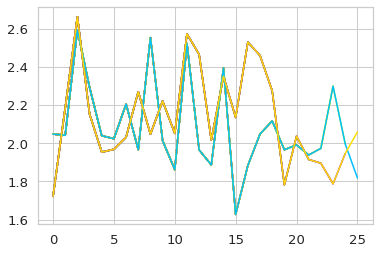

In [ ]:
for epoch in range(1, n_epochs + 1):
    for phase in ['train', 'eval']:
        optimizer.zero_grad()

        if phase == 'train':
            model.train()
        else:
            model.eval()
        
        _, _, inputs, targets = random_training_example(phase)
        
        with torch.set_grad_enabled(phase == 'train'):
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            _, preds = torch.max(outputs, 1)

            if phase == 'train':
                loss.backward()
                optimizer.step()
        
        if epoch % save_loss_every == 0:
            running_loss = loss.item() * inputs.size(1)
            running_corrects = torch.sum(preds == targets.data)
            epoch_loss = running_loss / len(targets)
            epoch_acc = running_corrects.double() / len(targets)
            losses[phase].append(epoch_loss)
            accs[phase].append(epoch_acc.item())
        
        if phase == 'eval' and epoch % print_every == 0:
            training_loss = statistics.mean(losses['train'])
            validation_loss = statistics.mean(losses['eval'])
            all_losses['train'].append(training_loss)
            all_losses['eval'].append(validation_loss)
            training_acc = statistics.mean(accs['train'])
            validation_acc = statistics.mean(accs['eval'])
            if validation_acc > best_acc:
                best_acc = validation_acc
                print(f'Best accuracy so far! Acc = {best_acc}')
                best_model_wts = copy.deepcopy(model.state_dict())
            print(f'{epoch} {epoch / n_epochs:.2%} / Train Loss: {training_loss:.4}, Validation Loss: {validation_loss:.4} / Train Accuracy: {training_acc:.2%}, Validation Accuracy: {validation_acc:.2%}')
            losses = {'train': [], 'eval': []}
            accs = {'train': [], 'eval': []}
        
        if phase == 'eval' and epoch % plot_every == 0:
            plt.plot(all_losses['train'], label='Train loss')
            plt.plot(all_losses['eval'], label='Validation loss')
            display.display(plt.gcf())
            display.clear_output(wait=True)
